<a href="https://colab.research.google.com/github/larissapaiva92/Metodos_Numericos/blob/master/Comparar_4codigos_Larissa_GaussPivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [12]:
!git clone https://github.com/larissapaiva92/Metodos_Numericos #clonar do Github
%cd Metodos_Numericos

Cloning into 'Metodos_Numericos'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.
/content/Metodos_Numericos/Metodos_Numericos/Metodos_Numericos


In [13]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi
from SystemSOR import SOR

/content/Metodos_Numericos/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/Metodos_Numericos/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/Metodos_Numericos/Metodos_Numericos/SystemSOR.py:11: RuntimeWarning: overflow encountered in double_scalars
  x2[i]=(-a[i].dot(x2)+b[i])*w/a[i,i]+x2[i]
/content/Metodos_Numericos/Metodos_Numericos/Jacobi.py:32: RuntimeWarning: overflow encountered in double_scalars
  sum += A[i,j]*x[j]


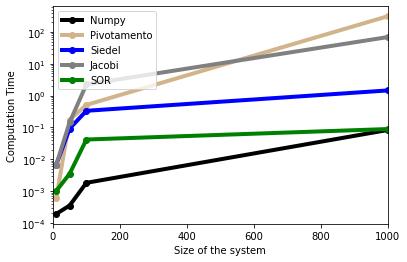

In [14]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_pivot = []
cpu_time_siedel = []
cpu_time_jacobi = []
cpu_time_SOR = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  x0 = np.random.rand(size)

  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # pivot
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_pivot.append(time.clock()-t0)

    # siedel
  t0 = time.clock()
  x= gauss_seidel(A,f,x0)
  cpu_time_siedel.append(time.clock()-t0)

    # jacob
  t0 = time.clock()
  x= jacobi(A,f,x0)
  cpu_time_jacobi.append(time.clock()-t0)

   # SOR
  t0 = time.clock()
  x= SOR(A,f,x0)
  cpu_time_SOR.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='black',label='Numpy')
plt.semilogy(SIZE,cpu_time_pivot,'o-',linewidth=4, color='tan',label='Pivotamento')
plt.semilogy(SIZE,cpu_time_siedel,'o-',linewidth=4, color='blue',label='Siedel')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='gray',label='Jacobi')
plt.semilogy(SIZE,cpu_time_SOR,'o-',linewidth=4, color='green',label='SOR')
plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1000])
plt.legend(loc=2)
plt.show()